In [23]:
%%time
from datetime import datetime
a = datetime.now()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


CPU times: total: 0 ns
Wall time: 997 µs


In [24]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Input, Activation
import tensorflow.keras as tfk

CPU times: total: 0 ns
Wall time: 0 ns


In [25]:
import sklearn.datasets
cancer=sklearn.datasets.load_breast_cancer()

In [26]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = cancer['target']

df['classification'] = y
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classification
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [28]:
# 212 - Malignant ~ 0
# 357 - Benign ~ 1

In [29]:
df['classification']= df['classification'].apply(lambda x : 1 if x==0 else 0)

<AxesSubplot:xlabel='classification', ylabel='count'>

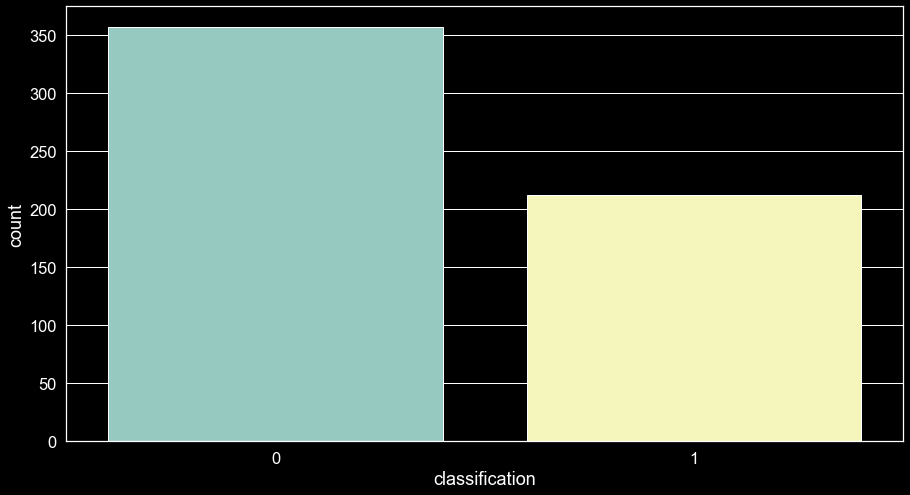

In [30]:
sns.countplot(data=df, x=df['classification'])

In [31]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

In [32]:
target='classification'
y=df[target].values
# X = df.loc[df.columns != target]
X = df.loc[:,df.columns != target].values


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=415)

In [34]:
pd.DataFrame(y_train).value_counts()

0    269
1    157
dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=415,stratify=y)
pd.DataFrame(y_train).value_counts()

0    267
1    159
dtype: int64

In [36]:
y_test.sum()

53

In [37]:
len(X_train), len(y_test)

(426, 143)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
model = Sequential()

In [41]:
model.add(Dense(128, input_dim=30, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=25)

In [65]:
%%time
history=model.fit(X_train,y_train, epochs=700,validation_data=(X_test,y_test),verbose=0,batch_size=2400, callbacks=[early_stop])

Epoch 26: early stopping
CPU times: total: 1.11 s
Wall time: 852 ms


In [66]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.000276,1.0,0.187553,0.993007
1,0.000275,1.0,0.187604,0.993007
2,0.000274,1.0,0.187619,0.993007
3,0.000273,1.0,0.187653,0.993007
4,0.000272,1.0,0.187707,0.993007
5,0.000271,1.0,0.187789,0.993007
6,0.000270,1.0,0.187859,0.993007
7,0.000269,1.0,0.187896,0.993007
8,0.000268,1.0,0.187907,0.993007
9,0.000266,1.0,0.187920,0.993007


In [67]:
hist = model.history.history

In [69]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.1888 - accuracy: 0.9930


[0.18878278136253357, 0.9930070042610168]

<AxesSubplot:>

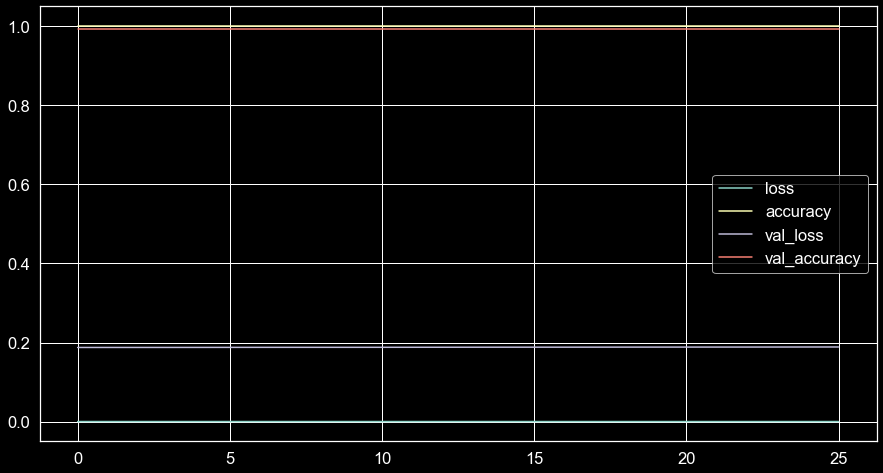

In [82]:
pd.DataFrame(hist).plot()

<AxesSubplot:>

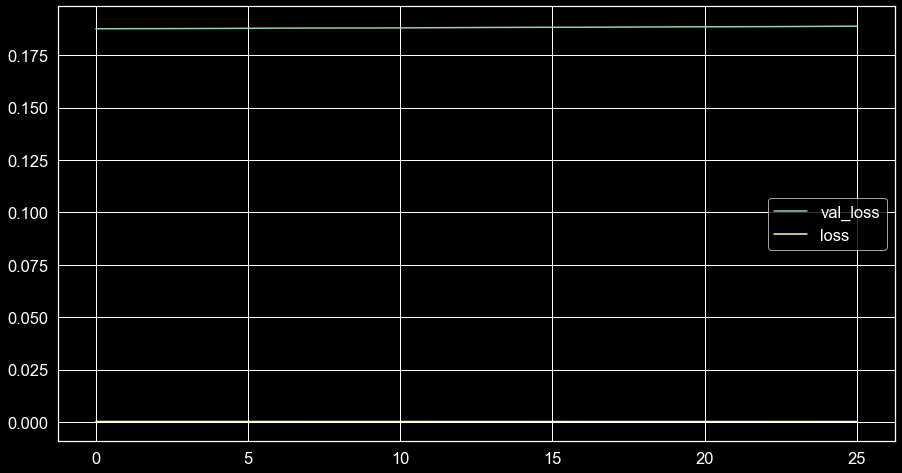

In [83]:
pd.DataFrame(hist)[['val_loss','loss']].plot()

<AxesSubplot:>

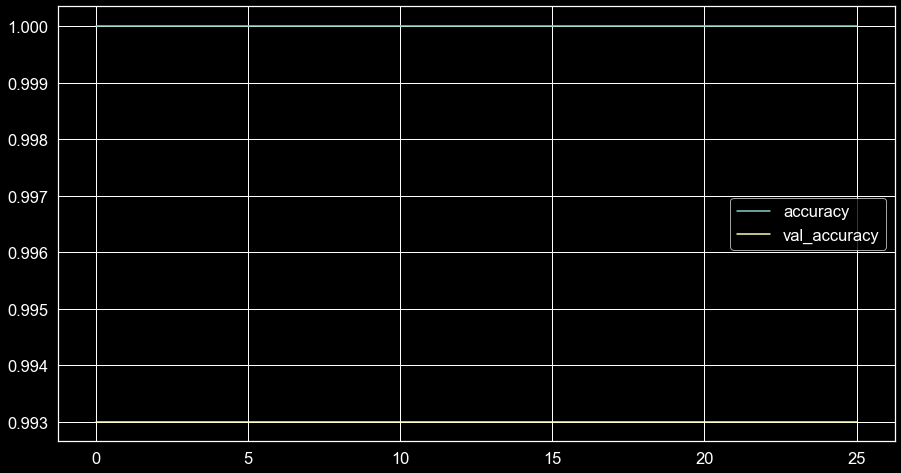

In [72]:
pd.DataFrame(hist)[['accuracy','val_accuracy']].plot()

In [73]:
pred = model.predict(X_test)

In [74]:
final = pd.DataFrame(pred, columns=['logit'])

In [75]:
final['binary']=final['logit'].apply(lambda x:1 if x>=0.50 else 0)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(classification_report(y_test,final['binary'].values))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.98      0.99        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



<AxesSubplot:>

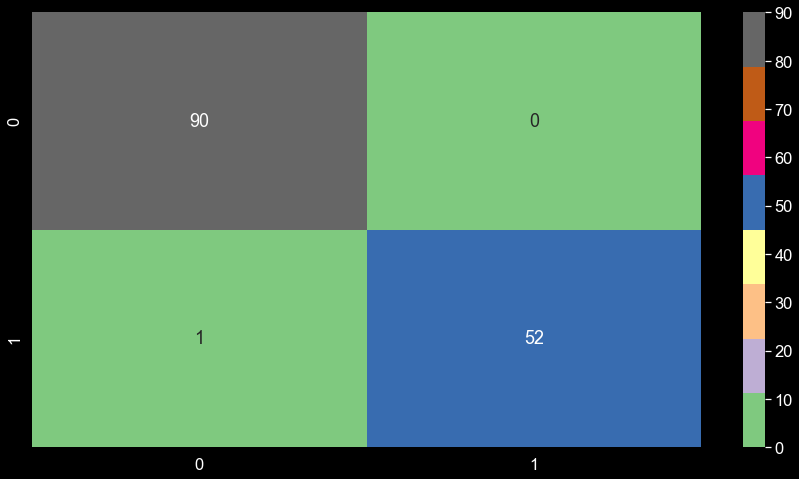

In [81]:
cm=confusion_matrix(y_test,final.binary)
sns.heatmap(cm,annot=True,cmap='Accent')

In [79]:
print(datetime.now() - a)

0:03:11.330520
